# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [4]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Defaulting to user installation because normal site-packages is not writeable
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [2]:
from ipywidgets import FloatProgress

In [3]:
# pip install jupyter

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
# Define transforms
## YOUR CODE HERE ##
transform = transforms.Compose([transforms.ToTensor(), 
                               transforms.Normalize((0.5,),(0.5,))])

# Create training set and define training dataloader
# YOUR CODE HERE ##
train_data = torchvision.datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64,
    num_workers=0)

# # Create test set and define test dataloader
# # YOUR CODE HERE ##
test_data = torchvision.datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, 
    num_workers=0)


/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

I chose to transform the images to tensors because it is a necessary step to facilitate data processing and allow efficient computation.more over, performing Normalization will help in standardizing the input data, making it easier for the model to learn and converge faster during training

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


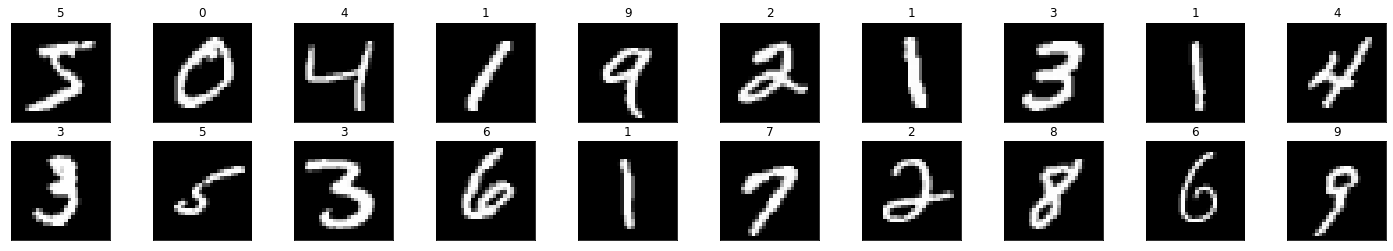

In [5]:
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

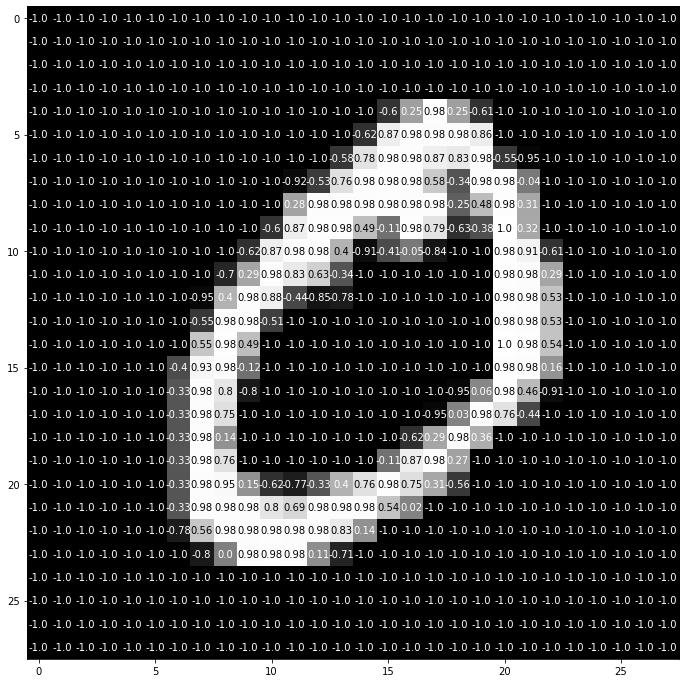

In [6]:
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [8]:
print(train_data.data.size())
print(test_data.data.size())

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [11]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

5


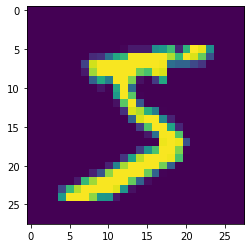

0


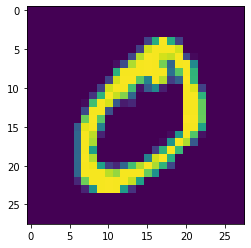

4


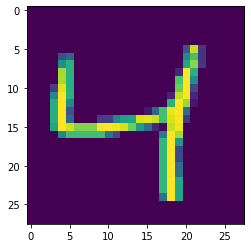

1


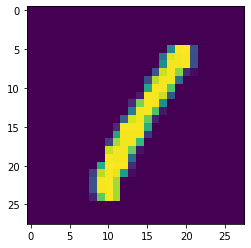

9


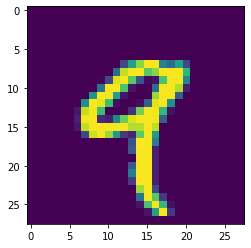

In [12]:
# Explore data
## YOUR CODE HERE ##
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [13]:
## YOUR CODE HERE ##

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
#       Linear layers
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512,512)
        self.fc3 = nn.Linear(512, 10)
#         Droup layer
        self.dropout = nn.Dropout(0.2)
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

#initializing
model = Net()
print(model)


Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [14]:
## YOUR CODE HERE ##
# specifying the loss function
criterion = nn.CrossEntropyLoss()

# specifying the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [15]:
## YOUR CODE HERE ##

# number of epochs 
num_epochs = 40
losses =[]
model.train()

for epoch in range(num_epochs):
    # monitoring the training loss
    train_loss = 0.0
    for data, target in train_loader:
#         zeroing the gradient 
        optimizer.zero_grad()
#       passing the inputs to the model to perm forward prop
        outputs = model(data)
        # calculating the loss
        loss = criterion(outputs, target)
        # computing the gradient of the loss with respect to model parameters
        loss.backward()
        # performing optimization step
        optimizer.step()
        # updating
        train_loss += loss.item()*data.size(0)
        
             
    # printing the training statistics 
    # calculating average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)
    losses.append(train_loss)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1, train_loss))

Epoch: 1 	Training Loss: 0.499529
Epoch: 2 	Training Loss: 0.223738
Epoch: 3 	Training Loss: 0.163903
Epoch: 4 	Training Loss: 0.132752
Epoch: 5 	Training Loss: 0.110832
Epoch: 6 	Training Loss: 0.096129
Epoch: 7 	Training Loss: 0.086607
Epoch: 8 	Training Loss: 0.076229
Epoch: 9 	Training Loss: 0.070863
Epoch: 10 	Training Loss: 0.062390
Epoch: 11 	Training Loss: 0.058080
Epoch: 12 	Training Loss: 0.053072
Epoch: 13 	Training Loss: 0.049094
Epoch: 14 	Training Loss: 0.044827
Epoch: 15 	Training Loss: 0.041622
Epoch: 16 	Training Loss: 0.038798
Epoch: 17 	Training Loss: 0.038119
Epoch: 18 	Training Loss: 0.034389
Epoch: 19 	Training Loss: 0.032398
Epoch: 20 	Training Loss: 0.032756
Epoch: 21 	Training Loss: 0.028650
Epoch: 22 	Training Loss: 0.028384
Epoch: 23 	Training Loss: 0.024787
Epoch: 24 	Training Loss: 0.024767
Epoch: 25 	Training Loss: 0.023062
Epoch: 26 	Training Loss: 0.022688
Epoch: 27 	Training Loss: 0.021266
Epoch: 28 	Training Loss: 0.019641
Epoch: 29 	Training Loss: 0.0

Plot the training loss (and validation loss/accuracy, if recorded).

<function matplotlib.pyplot.show(close=None, block=None)>

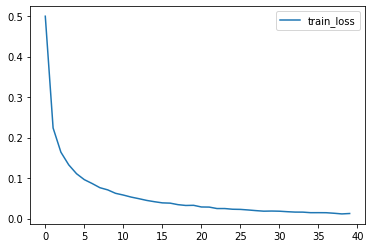

In [16]:
## YOUR CODE HERE ##

from matplotlib import pyplot as plt
plt.plot(losses, label='train_loss')
plt.legend()
plt.show

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [17]:
## YOUR CODE HERE ##

test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

# prepering the model
model.eval()

for data, target in test_loader:
    
    batch_size = data.size(0)
    #  passing the inputs to the model for forward prop
    output = model(data)
    # calculating the loss
    loss = criterion(output, target)
    # updating the loss 
    test_loss += loss.item()*data.size(0)
    # converting the output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # comparing the final predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculatiing the test accuracy for each object class

    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculating the average loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.066714

Test Accuracy of     0: 99% (974/980)
Test Accuracy of     1: 99% (1129/1135)
Test Accuracy of     2: 97% (1008/1032)
Test Accuracy of     3: 98% (997/1010)
Test Accuracy of     4: 98% (968/982)
Test Accuracy of     5: 98% (879/892)
Test Accuracy of     6: 97% (937/958)
Test Accuracy of     7: 96% (997/1028)
Test Accuracy of     8: 97% (950/974)
Test Accuracy of     9: 97% (984/1009)

Test Accuracy (Overall): 98% (9823/10000)


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [18]:
## YOUR CODE HERE ##

# specifying the optimizer (reducing the learning rate more)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

## YOUR CODE HERE ##

# number of epochs (increasing) 
num_epochs = 30

model.train()

for epoch in range(num_epochs):
    # monitoring the training loss
    train_loss = 0.0
    for data, target in train_loader:
#         zeroing the gradient 
        optimizer.zero_grad()
#       passing the inputs to the model to perm forward prop
        outputs = model(data)
        # calculating the loss
        loss = criterion(outputs, target)
        # computing the gradient of the loss with respect to model parameters
        loss.backward()
        # performing optimization step
        optimizer.step()
        # updating
        train_loss += loss.item()*data.size(0)
             
    # printing the training statistics 
    # calculating average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1, train_loss))

Epoch: 1 	Training Loss: 0.008169
Epoch: 2 	Training Loss: 0.007402
Epoch: 3 	Training Loss: 0.006493
Epoch: 4 	Training Loss: 0.006468
Epoch: 5 	Training Loss: 0.006768
Epoch: 6 	Training Loss: 0.006154
Epoch: 7 	Training Loss: 0.005739
Epoch: 8 	Training Loss: 0.005995
Epoch: 9 	Training Loss: 0.005756
Epoch: 10 	Training Loss: 0.006003
Epoch: 11 	Training Loss: 0.005554
Epoch: 12 	Training Loss: 0.005516
Epoch: 13 	Training Loss: 0.005196
Epoch: 14 	Training Loss: 0.005291
Epoch: 15 	Training Loss: 0.005203
Epoch: 16 	Training Loss: 0.005004
Epoch: 17 	Training Loss: 0.004996
Epoch: 18 	Training Loss: 0.005061
Epoch: 19 	Training Loss: 0.004953
Epoch: 20 	Training Loss: 0.005048
Epoch: 21 	Training Loss: 0.004228
Epoch: 22 	Training Loss: 0.004854
Epoch: 23 	Training Loss: 0.004534
Epoch: 24 	Training Loss: 0.004852
Epoch: 25 	Training Loss: 0.004594
Epoch: 26 	Training Loss: 0.004671
Epoch: 27 	Training Loss: 0.004425
Epoch: 28 	Training Loss: 0.004757
Epoch: 29 	Training Loss: 0.0

In [19]:
## YOUR CODE HERE ##

test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

# prepering the model
model.eval()

for data, target in test_loader:
    
    batch_size = data.size(0)
    #  passing the inputs to the model for forward prop
    output = model(data)
    # calculating the loss
    loss = criterion(output, target)
    # updating the loss 
    test_loss += loss.item()*data.size(0)
    # converting the output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # comparing the final predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculatiing the test accuracy for each object class

    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculating the average loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.058892

Test Accuracy of     0: 99% (973/980)
Test Accuracy of     1: 99% (1128/1135)
Test Accuracy of     2: 98% (1014/1032)
Test Accuracy of     3: 98% (992/1010)
Test Accuracy of     4: 98% (966/982)
Test Accuracy of     5: 98% (878/892)
Test Accuracy of     6: 98% (944/958)
Test Accuracy of     7: 98% (1008/1028)
Test Accuracy of     8: 98% (959/974)
Test Accuracy of     9: 97% (986/1009)

Test Accuracy (Overall): 98% (9848/10000)


## Saving your model
Using `torch.save`, save your model for future loading.

In [20]:
## YOUR CODE HERE ##
torch.save(model.state_dict(), # Holds all the weights and biases
            'recognizer.pth')